# Exploratory Data Analysis

## European Matches
We will now explore the European matches dataset we had cleaned.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
european_matches = pd.read_csv('data/cleaned/european_matches.csv')

In [3]:
european_matches.head()

,date,home_win,home_player_1_overall_rating,home_player_1_potential,home_player_1_preferred_foot,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,...,wins_past_1_games,not_enough_past_games_1,wins_past_2_games,not_enough_past_games_2,wins_past_3_games,not_enough_past_games_3,wins_past_4_games,not_enough_past_games_4,wins_past_5_games,not_enough_past_games_5
0,2008-08-17 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
1,2008-08-16 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
2,2008-08-16 00:00:00,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
3,2008-08-17 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
4,2008-08-16 00:00:00,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1


We see that there is a lot of matches where we do not have much information about the players. We do not want the rows with too many missing values. We drop the rows that have fewer than 11 non-NA values. 

In [4]:
#See what columns do we have for players. 
player_columns = [column.split('11')[-1] for column in european_matches.columns if "home_player_11" in column]
player_columns

['_overall_rating',
 '_potential',
 '_preferred_foot',
 '_attacking_work_rate',
 '_defensive_work_rate',
 '_crossing',
 '_finishing',
 '_heading_accuracy',
 '_short_passing',
 '_volleys',
 '_dribbling',
 '_curve',
 '_free_kick_accuracy',
 '_long_passing',
 '_ball_control',
 '_acceleration',
 '_sprint_speed',
 '_agility',
 '_reactions',
 '_balance',
 '_shot_power',
 '_jumping',
 '_stamina',
 '_strength',
 '_long_shots',
 '_aggression',
 '_interceptions',
 '_positioning',
 '_vision',
 '_penalties',
 '_marking',
 '_standing_tackle',
 '_sliding_tackle',
 '_gk_diving',
 '_gk_handling',
 '_gk_kicking',
 '_gk_positioning',
 '_gk_reflexes']

In [5]:
def drop_columns_below_threshold(df, na_columns, threshold):
    """
    Drop rows with too many NAs in specified columns. threshold is min number of columns we want to have non-NA values.
    """
    df = df.copy()
    #Keep rows with number of non-NA values above threshold in specified columns
    keep_indices = df[na_columns].dropna(thresh = threshold).index
    return df.loc[keep_indices]

In [6]:
home_rating_columns = ['home_player_{}_overall_rating'.format(i) for i in range(1, 12)]
away_rating_columns = ['away_player_{}_overall_rating'.format(i) for i in range(1, 12)]


european_matches = drop_columns_below_threshold(european_matches, home_rating_columns + away_rating_columns, 11)

In [7]:
european_matches.head()

,date,home_win,home_player_1_overall_rating,home_player_1_potential,home_player_1_preferred_foot,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,...,wins_past_1_games,not_enough_past_games_1,wins_past_2_games,not_enough_past_games_2,wins_past_3_games,not_enough_past_games_3,wins_past_4_games,not_enough_past_games_4,wins_past_5_games,not_enough_past_games_5
144,2009-02-28 00:00:00,0,66.0,68.0,left,medium,medium,20.0,20.0,34.0,...,0,0,0,1,0,1,0,1,0,1
145,2009-02-27 00:00:00,1,58.0,67.0,right,medium,medium,25.0,25.0,25.0,...,0,0,0,1,0,1,0,1,0,1
146,2009-02-28 00:00:00,1,70.0,74.0,right,medium,medium,11.0,11.0,12.0,...,1,0,1,1,1,1,1,1,1,1
147,2009-03-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,1,0,1,0,1
148,2009-03-01 00:00:00,-1,68.0,69.0,right,medium,medium,24.0,31.0,32.0,...,1,0,1,1,1,1,1,1,1,1


For each match, we compute the average statistics for the different ratings for each team and difference them. Just getting the total value would not unfortunately work due to some rows potentially having uneven number of values missing. We then take the difference in the statistic for the home team and away team. For goal keeping ratings, we will only look at the max of each team since in theory the goal keepers in a match should have the best goal keeper statistics.

In [8]:
diff_cols = []
for player_column in player_columns:
    home_cols = european_matches[['home_player_{}{}'.format(i, player_column) for i in range(2, 12)]].copy()
    away_cols = european_matches[['away_player_{}{}'.format(i, player_column) for i in range(2, 12)]].copy()
    #numeric column
    if np.issubdtype(european_matches['home_player_11{}'.format(player_column)].dtype, np.number):
        #since only one goal keeper, we just get max stat
        if 'gk' in player_column:
            european_matches['home{}'.format(player_column)] = home_cols.max(axis = 1)
            european_matches['away{}'.format(player_column)] = away_cols.max(axis = 1)        
            european_matches['diff{}'.format(player_column)] =  european_matches['home{}'.format(player_column)] - \
                                                                european_matches['away{}'.format(player_column)]
        else:
            european_matches['home{}'.format(player_column)] = home_cols.mean(axis = 1)
            european_matches['away{}'.format(player_column)] = away_cols.mean(axis = 1)
            european_matches['diff{}'.format(player_column)] =  european_matches['home{}'.format(player_column)] - \
                                                                european_matches['away{}'.format(player_column)]
        diff_cols.append('diff{}'.format(player_column))
    #non-numeric column
    else:
        continue 

In [9]:
european_matches[diff_cols].head()

,diff_overall_rating,diff_potential,diff_crossing,diff_finishing,diff_heading_accuracy,diff_short_passing,diff_volleys,diff_dribbling,diff_curve,diff_free_kick_accuracy,...,diff_vision,diff_penalties,diff_marking,diff_standing_tackle,diff_sliding_tackle,diff_gk_diving,diff_gk_handling,diff_gk_kicking,diff_gk_positioning,diff_gk_reflexes
144,-7.300000,-8.500000,-8.900000,1.000000,-2.600000,-10.300000,0.300000,-3.300000,-0.800000,-6.200000,...,-8.700000,-7.900000,-5.400000,-11.300000,-6.200000,0.0,-2.0,-21.0,-2.0,-2.0
145,-4.400000,-6.100000,-7.500000,-3.000000,1.800000,-1.200000,-8.711111,-4.300000,-7.222222,-3.700000,...,-1.955556,-6.900000,0.600000,-0.300000,3.411111,1.0,2.0,-1.0,2.0,2.0
146,1.571429,3.371429,6.000000,10.557143,7.042857,-2.271429,5.057143,12.528571,5.000000,2.814286,...,3.057143,-3.342857,-1.485714,-1.385714,-8.028571,-4.0,0.0,8.0,0.0,0.0
147,5.600000,6.400000,6.800000,5.400000,4.700000,2.800000,8.300000,12.500000,4.600000,2.300000,...,2.200000,7.700000,1.400000,4.900000,2.300000,-2.0,-2.0,12.0,-2.0,-2.0
148,-4.111111,-4.555556,-5.888889,-5.333333,-1.222222,-6.000000,-8.166667,-8.111111,-10.888889,-2.555556,...,-7.444444,-5.222222,0.333333,0.222222,-4.833333,3.0,-1.0,5.0,-1.0,-1.0


In [10]:
len(diff_cols)

35

Now let's see if there are any differences in the distributions of the differences depending on whether the home team lost, won, or tied.

In [11]:
european_matches.groupby('home_win')[diff_cols].mean()

,diff_overall_rating,diff_potential,diff_crossing,diff_finishing,diff_heading_accuracy,diff_short_passing,diff_volleys,diff_dribbling,diff_curve,diff_free_kick_accuracy,...,diff_vision,diff_penalties,diff_marking,diff_standing_tackle,diff_sliding_tackle,diff_gk_diving,diff_gk_handling,diff_gk_kicking,diff_gk_positioning,diff_gk_reflexes
home_win,,,,,,,,,,,,,,,,,,,,,
-1,-0.419516,-0.407976,-0.439642,-0.170056,-0.398941,-0.514052,-0.364226,-0.419433,-0.335357,-0.159442,...,-0.473570,-0.336995,-0.531586,-0.604938,-0.692773,0.007508,0.005423,-0.252225,0.008899,-0.017380
0,-0.036114,-0.045361,-0.039283,0.192313,-0.063800,-0.059223,0.047172,0.088586,0.062112,-0.012367,...,-0.001863,0.023110,-0.401185,-0.409736,-0.437567,-0.096896,-0.076729,-0.118481,-0.106507,-0.087600
1,0.453436,0.400829,0.526705,0.653365,0.290365,0.493775,0.736320,0.613548,0.636275,0.551740,...,0.581423,0.589846,-0.169447,-0.104668,-0.089279,0.029288,0.028414,0.331264,0.028939,0.056916


From looking at the mean, it seems in general the mean value for a difference in rating when the home team wins is the greatest out of the three outcomes while the mean value for the difference in rating when the home team loses is the lowest ouf the three outcomes. This seems consistent with what we believe. However, the mean differences seem a little low for any of these cases, especially since the rating ranges from 0 to 100, so mean differences of such small magnitudes might not be significant. Let's plot the distributions themselves.

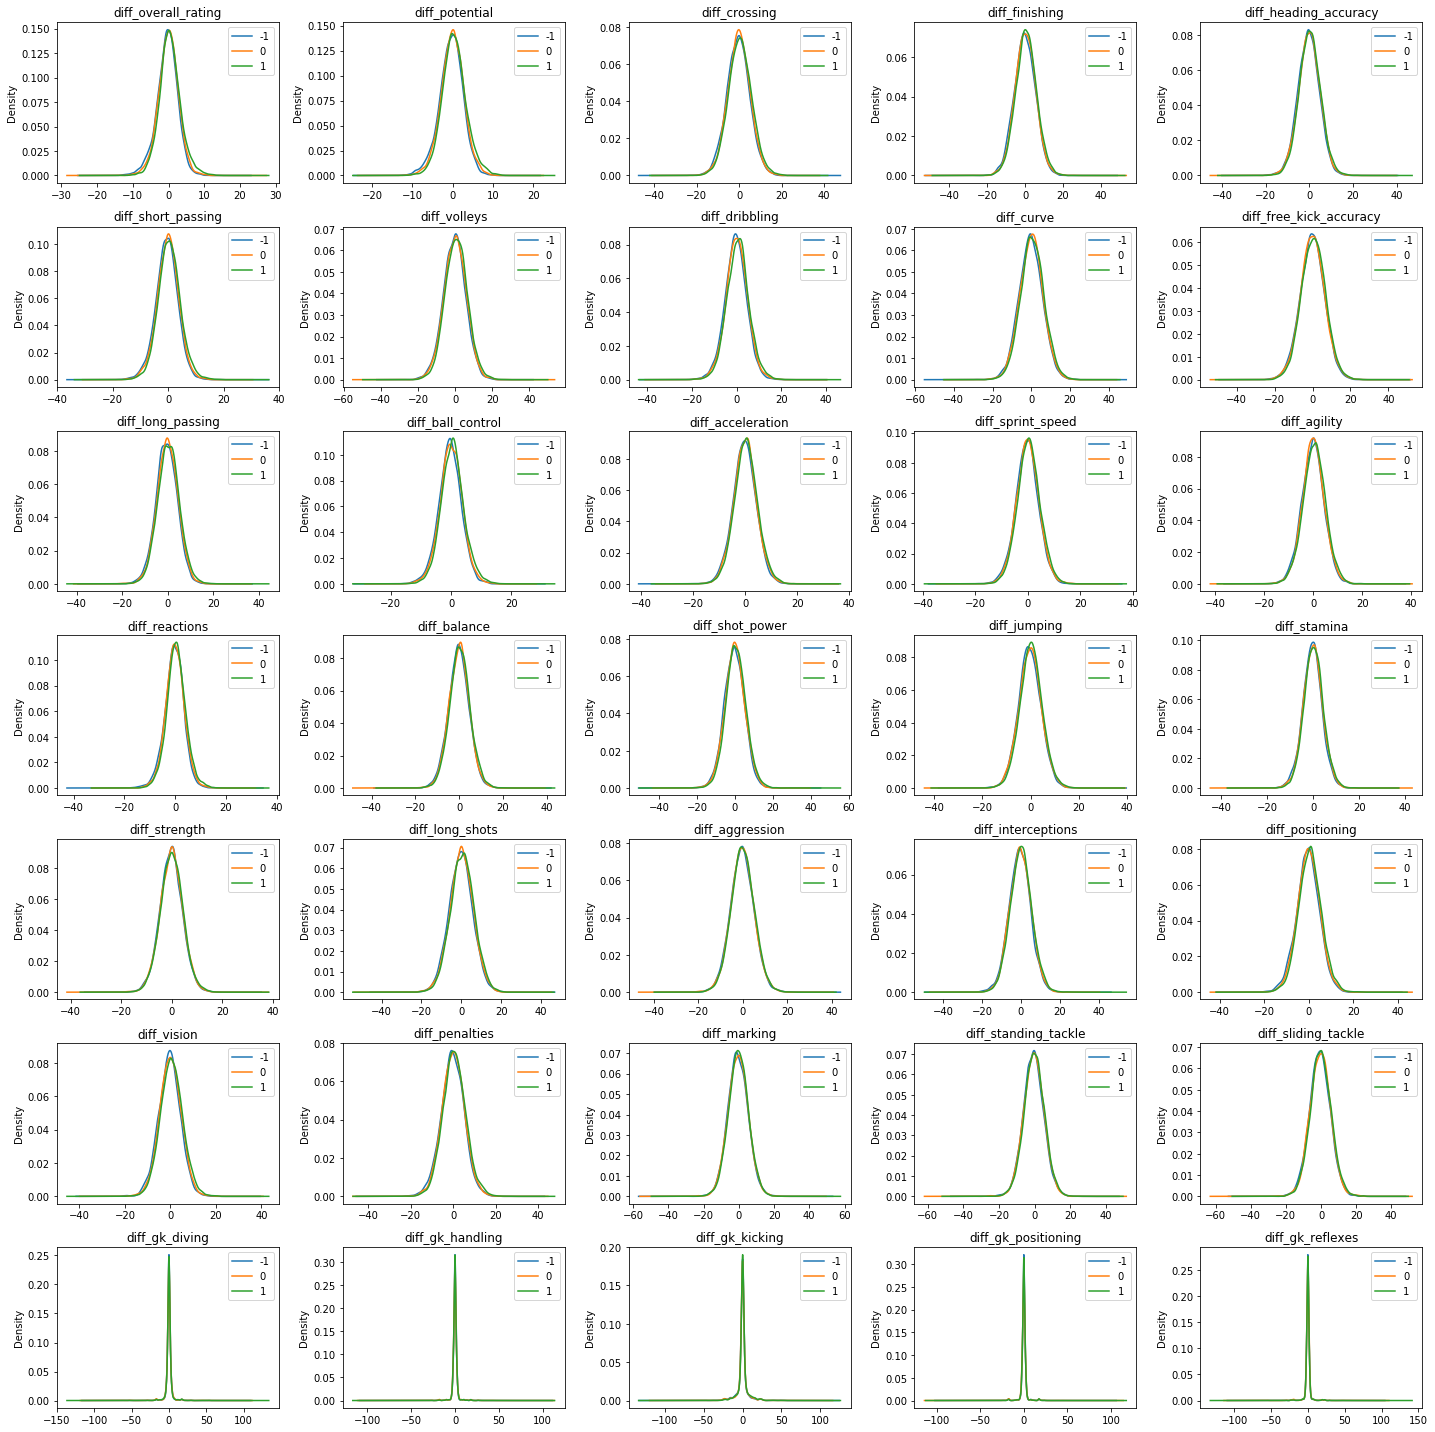

In [12]:
fig, axes = plt.subplots(7, 5, figsize = (20, 20))
axes = axes.flatten()
for label, df in european_matches.groupby('home_win'):
    for i, col in enumerate(diff_cols):
        df[col].plot.kde(label=label, ax = axes[i])
        axes[i].set_title(col)
        axes[i].legend()
plt.tight_layout();

Wow! From looking at the plots the distributions of a difference in rating among the three outcome do not really seem that different. 

This might be an indication that using individual ratings and aggregating them might not be the way to go. Also, so far efforts to get the individual ratings for the actual World Cup data have been unsuccessful, so this may be a sign to find other set of features to predict the world cup. (Later we will see an attempt of using team statistics)

Let us also look at whether previous match results will be good predictors. 

In [13]:
past_wins_columns = []
for i in range(1, 6):
    european_matches['diff_wins_past_{}_games'.format(i)] = (european_matches['home_wins_past_{}_games'.format(i)] -\
                                                             european_matches['away_wins_past_{}_games'.format(i)])
    past_wins_columns.append('diff_wins_past_{}_games'.format(i))
    #games against each other
    past_wins_columns.append('wins_past_{}_games'.format(i))

len(past_wins_columns)

10

In [14]:
european_matches.groupby('home_win')[past_wins_columns].mean()

,diff_wins_past_1_games,wins_past_1_games,diff_wins_past_2_games,wins_past_2_games,diff_wins_past_3_games,wins_past_3_games,diff_wins_past_4_games,wins_past_4_games,diff_wins_past_5_games,wins_past_5_games
home_win,,,,,,,,,,
-1,-0.203977,0.240128,-0.171301,0.468993,-0.273776,0.672414,-0.301307,0.849833,-0.375834,1.000139
0,-0.145738,0.261383,-0.074366,0.517725,-0.161651,0.745392,-0.144635,0.936033,-0.160548,1.101780
1,-0.100192,0.288337,0.026666,0.585679,0.009617,0.851985,0.091974,1.077024,0.103689,1.271201


We see a similar pattern as before, where home team winning has the highest mean values and away team winning has the lowest mean values. This time the small magnitudes make sense however since we are only looking up to 5 games back. Let us also plot the distributions.

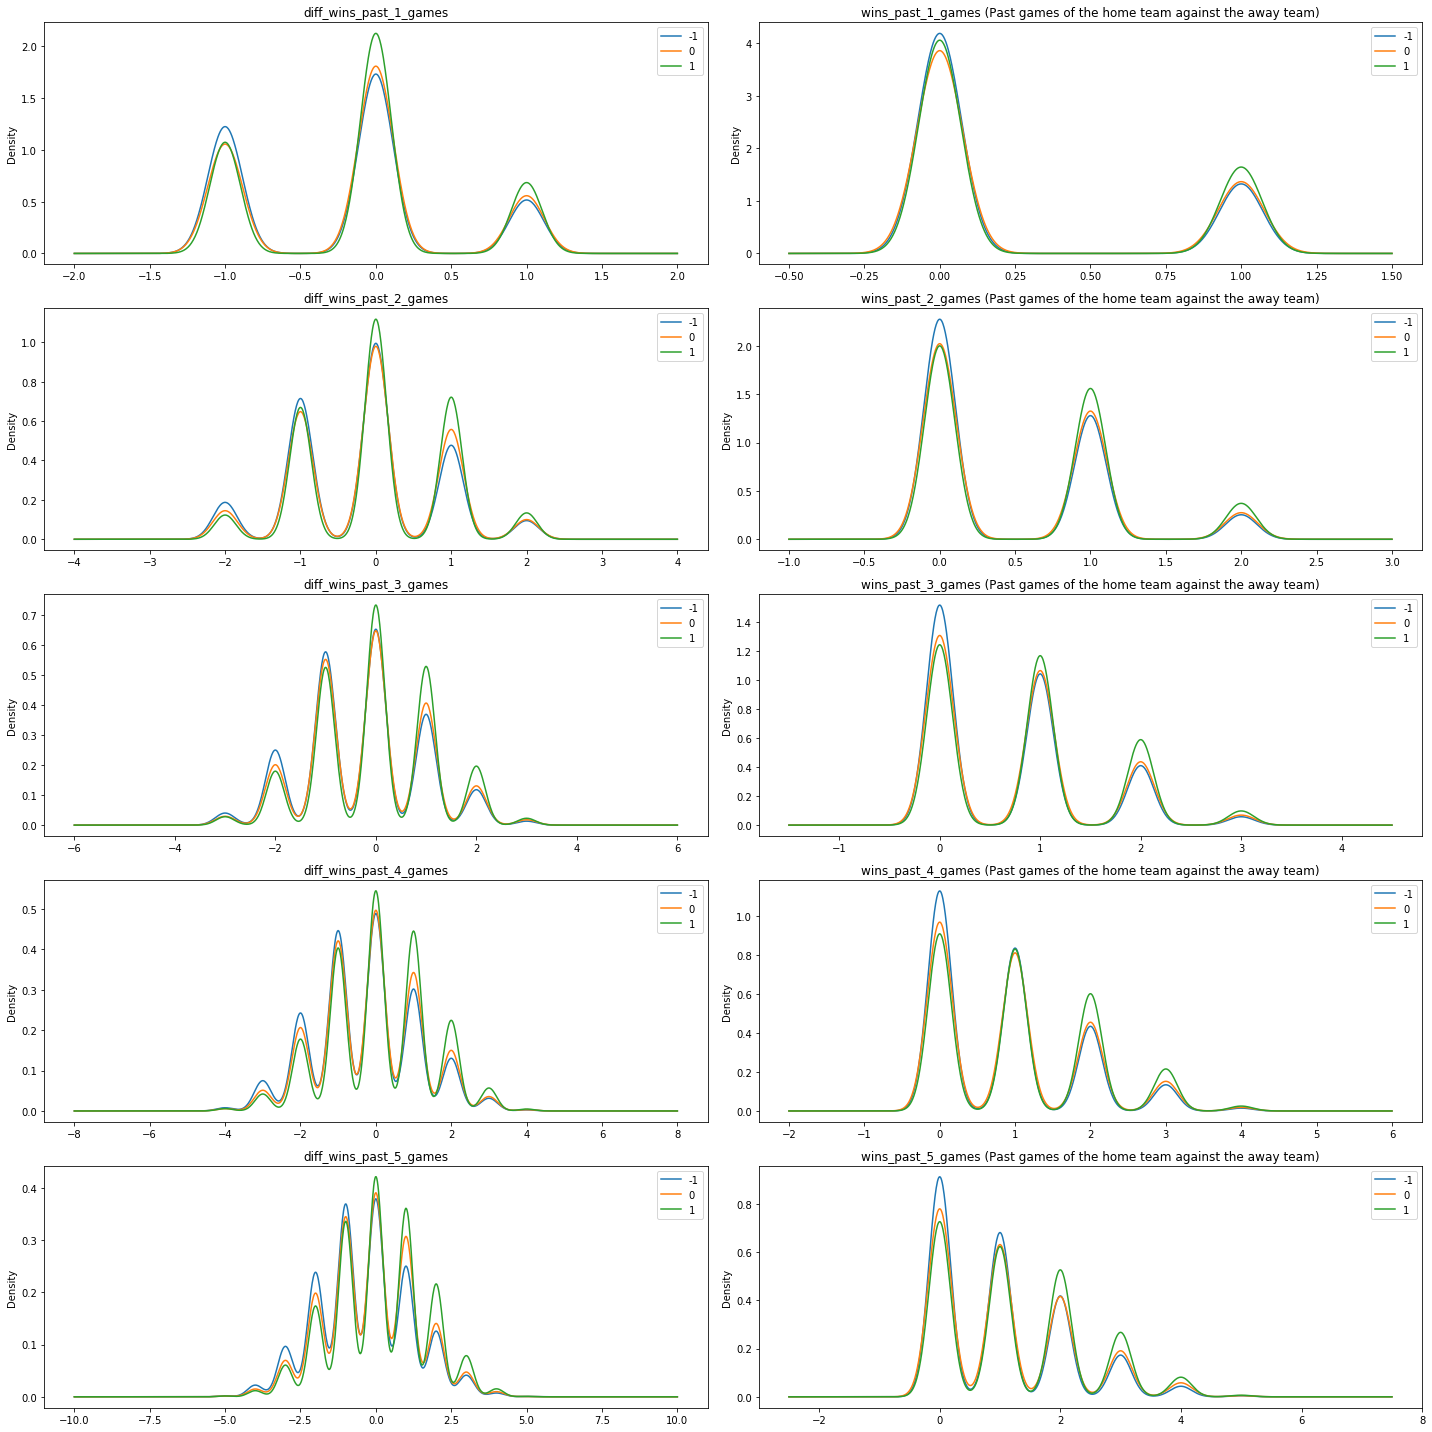

In [15]:
fig, axes = plt.subplots(5, 2, figsize = (20, 20))
axes = axes.flatten()
for label, df in european_matches.groupby('home_win'):
    for i, col in enumerate(past_wins_columns):
        df[col].plot.kde(label=label, ax = axes[i])
        #odd plots are the plots of the teams against each other
        if i % 2 == 1:
            axes[i].set_title(col + " (Past games of the home team against the away team)")
        else:
            axes[i].set_title(col)
        axes[i].legend()
plt.tight_layout();

This time it is a bit more obvious that home team winning tends to have higher values. It seems like we can probably calculate some kind of momentum and utilize it as a predictor. We will explore more of this concept later on when we make our advanced model.

## Conclusion From Europen Dataset

From exploration of the European dataset, we saw that aggregating individual player ratings does not seem to help that much while previous matches seem to help. Thus, we decided to only keep the summary statistics of the team rather than players' individual statistics. We will keep these discoveries in mind as we move on to the SOFIFA datasets.

## Further Exploring Other Features

In [18]:
df = pd.read_csv('data/cleaned/train_final.csv')
custom_log = lambda x: 0 if x==0 else np.log(x)
df['log_gdp_diff']= df['gdp_diff'].apply(custom_log)
win_corr = df.corr(method='spearman')['home_win'].sort_values().drop('home_win')
ind = np.arange(len(win_corr))

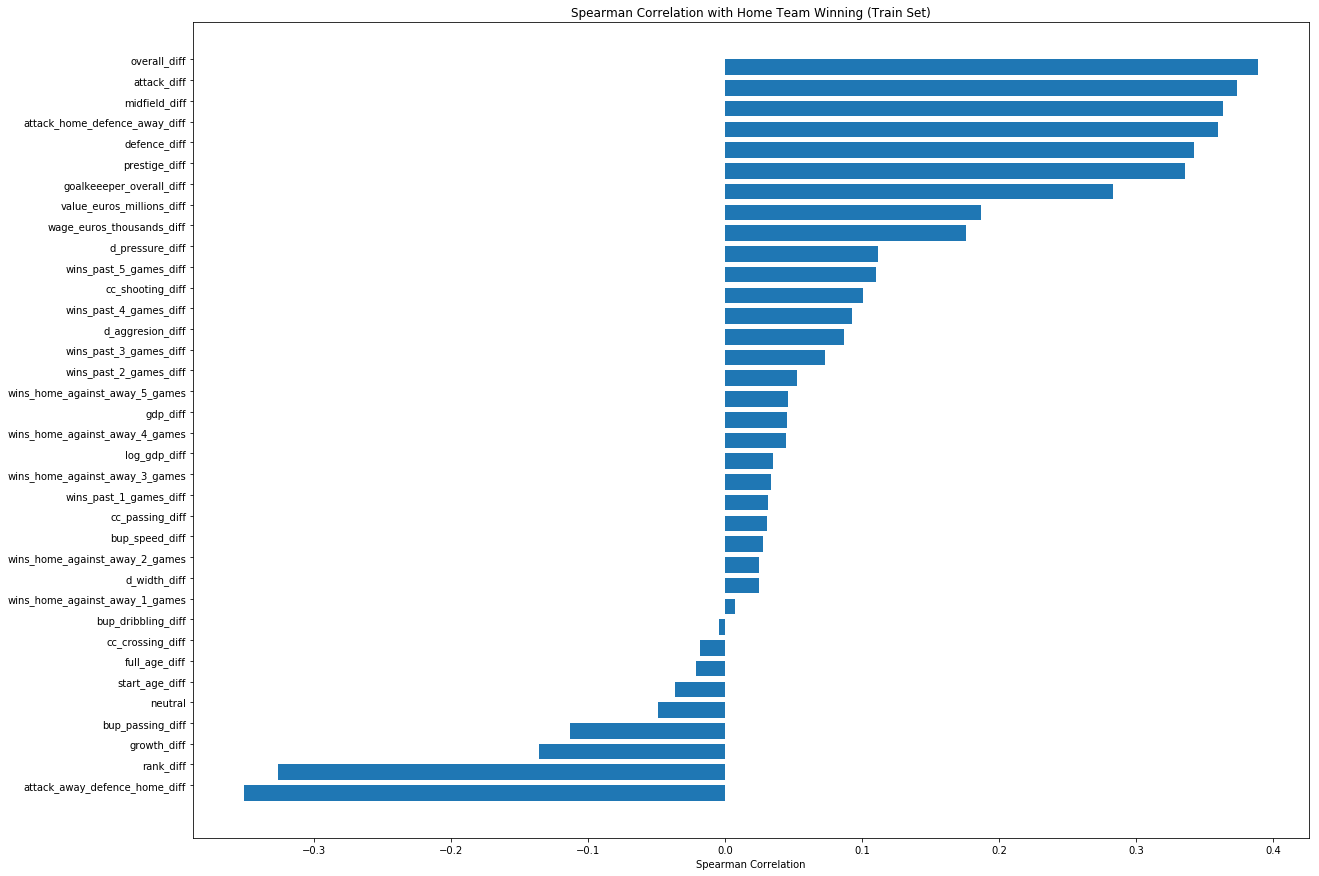

In [19]:
fig, ax = plt.subplots(figsize=(20,15)) 
width = 0.75
ax.barh(ind, win_corr, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(win_corr.index, minor=False)
ax.set_xlabel("Spearman Correlation")
ax.set_title("Spearman Correlation with Home Team Winning (Train Set)")
plt.show()

The spearman correlation plot gives us an idea of how well these features correlate with our dependent variable. In other words, the highly correlated features, such as overall difference in ratings should give us a fairly good idea of team 1/home team winning. 

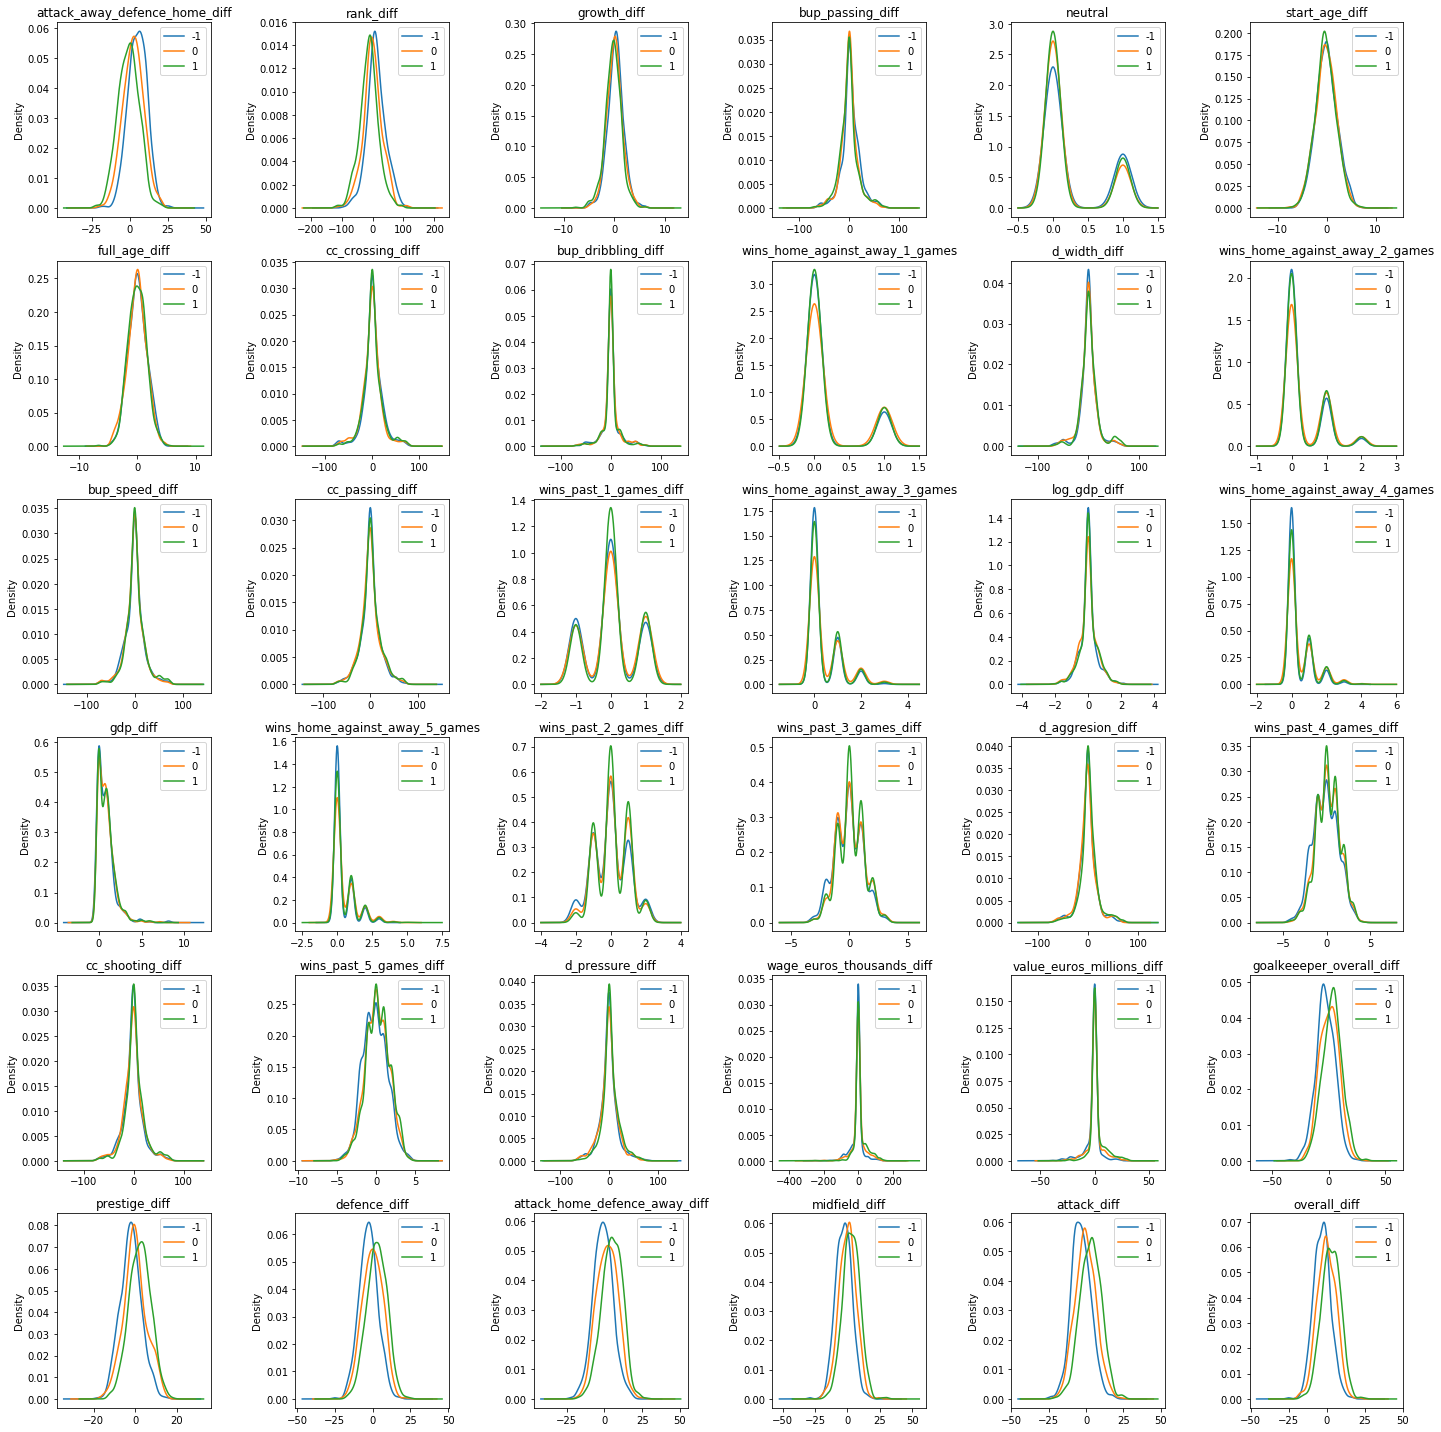

In [20]:
df_plot = df.copy()
df_plot.neutral = df_plot.neutral.astype('int')
fig, axes = plt.subplots(6, 6, figsize = (20, 20))
axes = axes.flatten()
for label, df_group in df_plot.groupby('home_win'):
    for i, col in enumerate(win_corr.index):
        df_group[col].plot.kde(label=label, ax = axes[i])
        axes[i].set_title(col)
        axes[i].legend()
plt.tight_layout();

In fact, from the distribution plot we see that the features, such as overall difference in ratings and goalkeeper rating difference, that can better discriminate win, loss for team 1 are more highly correlated with the win/lose. Similarly, features, such as build up dribbling difference, which have low correlation barely show any difference between distribution of different outcomes.

Text(0.5, 1.0, 'Boxplot of goalkeeper rating difference')

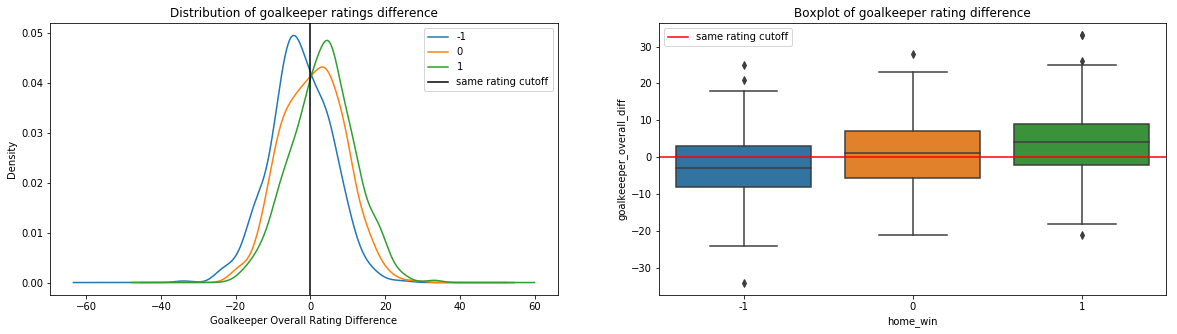

In [21]:
fig, axes= plt.subplots(1,2, figsize=(20,5))
for label, df_group in df.groupby('home_win'):
    df_group['goalkeeeper_overall_diff'].plot.kde(label = label, ax = axes[0])
axes[0].axvline(0, label = "same rating cutoff", color = 'black')
axes[0].set_xlabel("Goalkeeper Overall Rating Difference")
axes[0].legend()
axes[0].set_title("Distribution of goalkeeper ratings difference")

sns.boxplot(x ='home_win', y = 'goalkeeeper_overall_diff', data = df, ax = axes[1])
axes[1].axhline(0, color = 'red', label = "same rating cutoff")
axes[1].legend()
axes[1].set_title("Boxplot of goalkeeper rating difference")

Inspecting one of the highly correlated features closely, we see that when the difference is positive (team 1 has an advantage), the likelihood of winning is much higher whereas when it's negative it's much more likely to lose. 

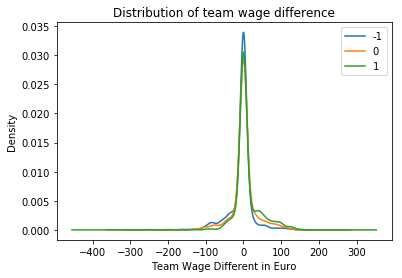

In [22]:
plt.figure()
for label, df_group in df.groupby('home_win'):
    df_group['wage_euros_thousands_diff'].plot.kde(label = label)
#plt.axvline(0, label = "cutoff same GDP ratio", color = 'black')
plt.xlabel("Team Wage Different in Euro")
plt.title("Distribution of team wage difference")
plt.legend()

However, there are also some features that don't have really high correlation and can still discriminate well the win/lose situations when the difference is large. For instance, for the team wage difference, we see when the difference is large, it is much more likely to win/lose, but there is barely any difference in the middle peaking at 0. This is happening because we imputed missing values with 0 to encode lack of information. In fact, in these cases we have a lot of distributions with a really high peak at 0, causing low correlation. Nonetheless, they can still be useful when we do possess the information. 

## Exploring PCA

Inspecting these distribution of features, we noticed them a large proportion of them are similarly shaped and distributed. Therefore, we considered PCA to perform dimensionality reduction, aggregating similar features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

In [25]:
# import data
train = pd.read_csv('data/cleaned/train_final.csv')
test = pd.read_csv('data/cleaned/test_final.csv')
train = train.fillna(0)

np.random.seed(3)
X_train, X_validation = train_test_split(train, test_size = 0.2)
y_train = X_train['home_win'].ravel()
X_train = X_train.drop(['home_win'], axis = 1)
y_validation = X_validation['home_win'].ravel()
X_validation = X_validation.drop(['home_win'], axis = 1)
y_test = test['home_win'].ravel()

In [125]:
train_scores = {}
val_scores = {}

xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

rf_params = {'bootstrap': [True, False],
     'max_depth': [3, 5, 10, 20, 30, 40, None],
'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 100, 200, 500, 1000]}

rf_estimator = RandomizedSearchCV(estimator=XGBClassifier(objective='multi:softmax', num_class = 3), param_distributions=xgb_params,\
            scoring='accuracy', n_jobs=-1, cv=5, verbose=0)
    
xgb_estimator = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rf_params,\
                scoring='accuracy', n_jobs=-1, cv=5, verbose=0)

lr_estimator = LogisticRegressionCV(solver = 'lbfgs', max_iter = 5000, cv = 5, multi_class='multinomial')

lda_estimator = LinearDiscriminantAnalysis()

qda_estimator = QuadraticDiscriminantAnalysis()

models = {'Random Forest': rf_estimator, 'XGBoost': xgb_estimator, \
         'Logistic Regression': lr_estimator, 'LDA': lda_estimator, \
         'QDA': qda_estimator}

for comp in range(2,16):
    print("working on {}".format(comp))
    X_tr = X_train.iloc[:,6:]

    scaler = StandardScaler()
    scaler.fit(X_tr)
    X_tr_scaled = scaler.transform(X_tr)

    dim = X_train.shape[1]
    pca = PCA(n_components=comp).fit(X_tr_scaled)
    X_tr_pca = pca.transform(X_tr_scaled)
    new_cols = ["PCA Comp {}".format(i) for i in range(comp)]
    
    X_val = X_validation.iloc[:,6:]#test.drop(['Group'],axis=1).iloc[:,6:]
    X_val_scaled = scaler.transform(X_val)
    X_val_pca = pca.transform(X_val_scaled)
    
    train_scores[comp] = {}
    val_scores[comp] = {}
    for name, estimator in models.items():
        model = estimator.fit(X_tr_pca, y_train)
        train_scores[comp][name] = model.score(X_tr_pca, y_train)
        val_scores[comp][name] = model.score(X_val_pca, y_validation)

working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15


In [126]:
df_train_score = pd.DataFrame(train_scores).T
df_val_score = pd.DataFrame(val_scores).T

In [127]:
df_train_score

,LDA,Logistic Regression,QDA,Random Forest,XGBoost
2,0.523401,0.524061,0.516809,0.526038,0.529993
3,0.518787,0.518787,0.507581,0.526697,0.783125
4,0.515491,0.518128,0.520765,0.531971,0.530653
5,0.516150,0.518787,0.526038,0.528016,0.529334
6,0.518787,0.521424,0.528675,0.528016,0.531971
7,0.514832,0.520765,0.533949,0.530653,0.536585
8,0.517469,0.519446,0.528675,0.533289,0.532630
9,0.520765,0.518787,0.526038,0.550428,0.535926
10,0.518787,0.520105,0.532630,0.541200,0.535267
11,0.515491,0.520765,0.529993,0.539881,0.531971


In [128]:
# without PCA
original_scores = {'train_score':{}, 'validation_score':{}}
for name, estimator in models.items():
    model = estimator.fit(X_train.iloc[:,6:], y_train)
    original_scores['train_score'][name] = model.score(X_train.iloc[:,6:], y_train)
    original_scores['validation_score'][name] = model.score(X_validation.iloc[:,6:], y_validation)

In [129]:
df_ori_score = pd.DataFrame(original_scores)

In [130]:
df_ori_score

,train_score,validation_score
LDA,0.526038,0.486842
Logistic Regression,0.522083,0.500000
QDA,0.601846,0.415789
Random Forest,0.612393,0.507895
XGBoost,0.535267,0.492105


In [131]:
df_val_score.head()

,LDA,Logistic Regression,QDA,Random Forest,XGBoost
2,0.484211,0.481579,0.494737,0.473684,0.476316
3,0.473684,0.473684,0.489474,0.478947,0.468421
4,0.492105,0.473684,0.486842,0.476316,0.489474
5,0.489474,0.489474,0.494737,0.486842,0.486842
6,0.497368,0.489474,0.494737,0.486842,0.473684


Text(0.5, 0, 'Number of PCA components')

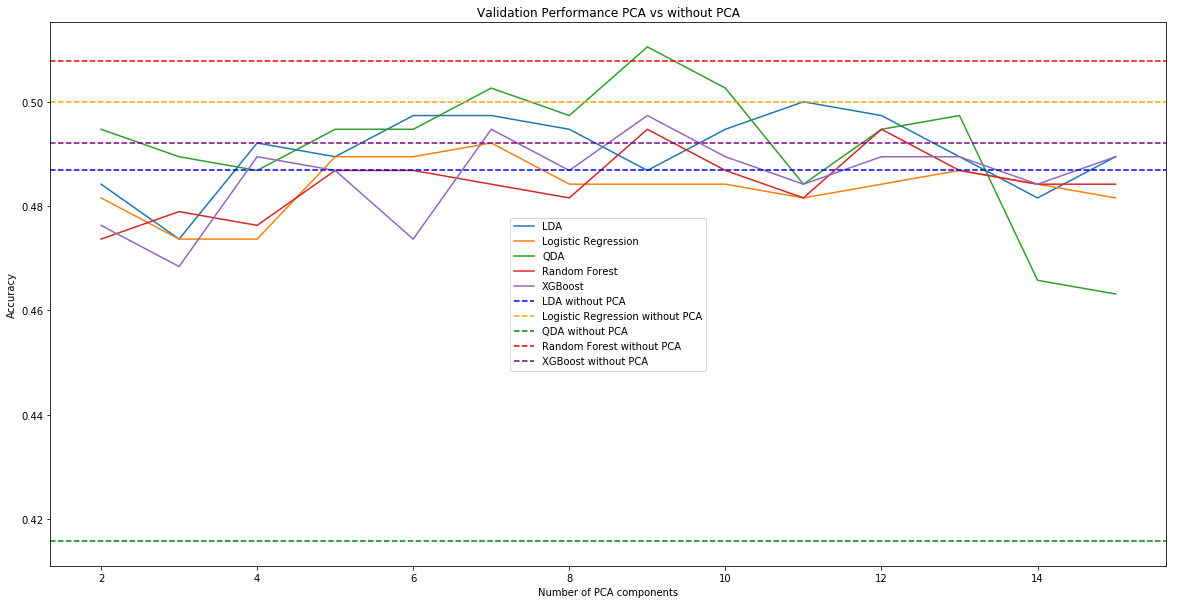

In [132]:
df_val_score.plot(figsize=(20,10))
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, score in enumerate(df_ori_score.validation_score):
    plt.axhline(score, linestyle = '--', color = colors[i], label = "{} without PCA".format(df_ori_score.validation_score.index[i]))
plt.legend() 
plt.title("Validation Performance PCA vs without PCA")
plt.ylabel("Accuracy")
plt.xlabel("Number of PCA components")

In [133]:
best_model = df_val_score.max().argmax()
print("Model with highest validation score: {}".format(best_model))
best_comp = df_val_score[best_model].argmax()
print("Number of PCA components that produce best model: {}".format(best_comp))

Model with highest validation score: QDA
Number of PCA components that produce best model: 9


## Summary 

First of all, we notice that PCA helps models like LDA and QDA perhaps because of the independent assumption of components imposed by PCA. On the other hand, the performance for Logistic Regression, Random Forest, XGBoost seem to be slightly hurt by the reduced information from PCA. 

Nonetheless, we see that the best model is QDA with 9 components from PCA. This probably means that performing dimensionality reduction is probably quite helpful in summarizing the information from the data with similar distributions. We will keep this in mind when picking the final model. 

## Interpreting PCA

In [2]:
from matplotlib.pyplot import cm

In [142]:
# import data
train = pd.read_csv('data/cleaned/train_final.csv')
train = train.fillna(0)
X = train.iloc[:,6:]

# scale data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# pca decomposition
dim = X.shape[1]
pca = PCA().fit(X_scaled)
scores = pca.transform(X_scaled)

# correlation between PCs and data
pc_cors = np.corrcoef(X_scaled, scores, rowvar=False)[:dim, dim:] # only want cor(x, y)


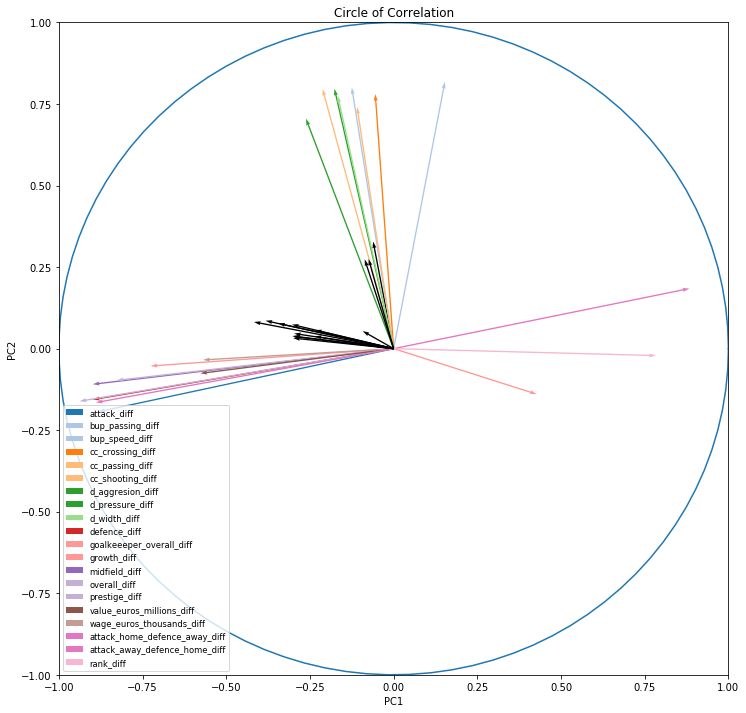

In [143]:
# # https://stackoverflow.com/questions/37815987/plot-a-correlation-circle-in-python
# https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib


# get top 20 
vec_len = [np.sqrt(pc_cors[i,0]**2 + pc_cors[i,1]**2) for i in np.arange(dim)]
top20_vec = sorted(range(len(vec_len)), key=lambda i: vec_len[i], reverse=True)[:20]

x = np.zeros((35,1))
y = np.zeros((35,1))
u = pc_cors[:,0]
v = pc_cors[:,1]

fig, ax = plt.subplots(figsize=(12, 12))

color = iter(cm.tab20(np.linspace(0,1,dim)))

for i in np.arange(dim):
    c = next(color)
    if i in top20_vec:
        ax.quiver(0, 0, pc_cors[i,0], pc_cors[i,1], 
                  scale=1, 
                  angles='xy', 
                  scale_units='xy',
                  width=0.002,
                  label=X.columns.values[i],
                  color=c)
    else:
        ax.quiver(0, 0, pc_cors[i,0], pc_cors[i,1], 
                  scale=1, 
                  angles='xy', 
                  scale_units='xy',
                  width=0.002)        


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale        

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title('Circle of Correlation')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.legend(loc=3, fontsize='small');

We only highlighted the top 20 predictors with largest correlation magnitude as these are likely to be the more important predictors. 

`start_age_diff` and `full_age_diff` are naturally correlated, and seem to explain a substantial amount of variation in the data. `growth_diff`, which is on the other side of the correlation circle, seems to explain variation that is almost the opposite of `start_age_diff` and `full_age_diff`. This makes intuitive sense as we would expect younger players to have more room for growth.

`attack_away_defence_home_diff` and `rank_diff` also seem to be explain similar variation in the data. The rest of the predictors are all clustered at the 3 o'clock region of the circle, right across the predictors `attack_away_defence_home_diff` and `rank_diff`. This suggests that these predictors explain similar variation in the data and might be correlated.

In [144]:
# import data
sofifa = pd.read_csv('data/sofifa_final.csv')
sofifa['date'] = pd.to_datetime(sofifa['date'], utc=True)

teams = ['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal']

pre_wc_rating = sofifa[(sofifa.team.isin(teams)) & (sofifa.date == '2018-06-16')]
teams_wc = pre_wc_rating.team.values
pre_wc_rating = pre_wc_rating.iloc[:,2:]

In [145]:
# check that we have 32 teams
assert pre_wc_rating.shape[0] == 32

In [146]:
# scale data
scaler_wc = StandardScaler()
scaler.fit(pre_wc_rating)
pre_wc_rating_scaled = scaler.transform(pre_wc_rating)


pca_wc_mod = PCA().fit(pre_wc_rating_scaled)
pca_wc = pca_wc_mod.transform(pre_wc_rating_scaled)
n = pca_wc.shape[0]
d = pca_wc.shape[1]

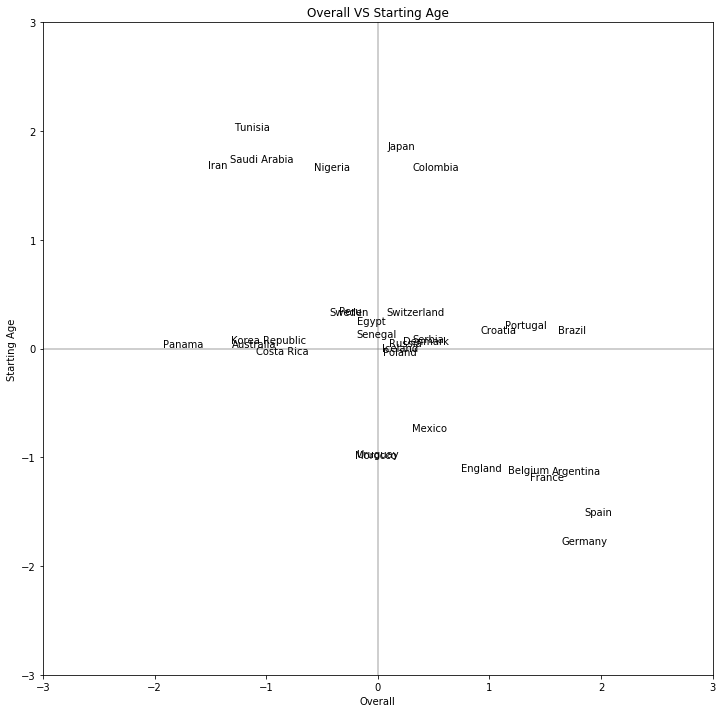

In [147]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

for i in np.arange(n):
    ax.text(pre_wc_rating_scaled[i,2]+np.random.uniform(0,0.1), 
            pre_wc_rating_scaled[i,7]+np.random.uniform(0,0.1), teams_wc[i])

    
ax.axhline(0, color='gray', alpha=0.5)
ax.axvline(0, color='gray', alpha=0.5)
ax.set_title('Overall VS Starting Age')
ax.set_xlabel('Overall')
ax.set_ylabel('Starting Age');

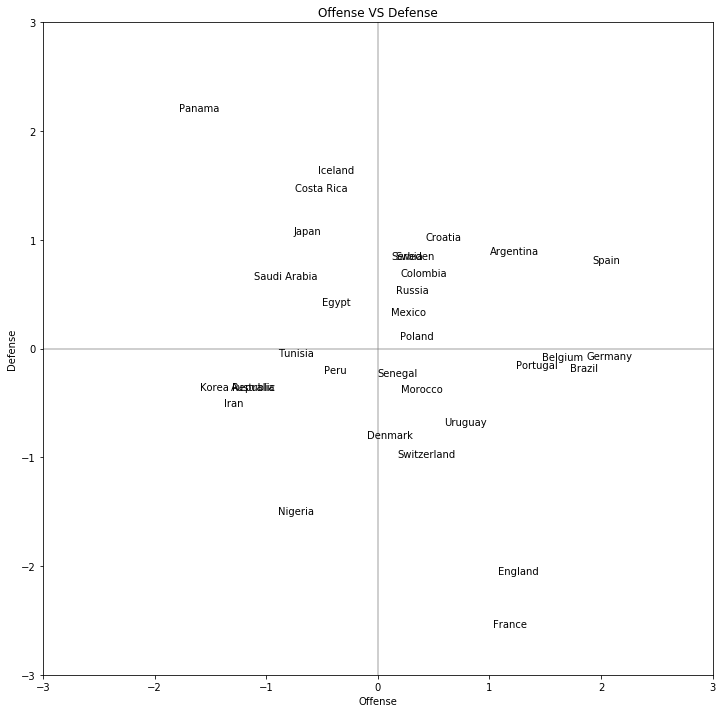

In [148]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

for i in np.arange(n):
    ax.text(pre_wc_rating_scaled[i,3]+np.random.uniform(0,0.1), 
            pre_wc_rating_scaled[i,5]+np.random.uniform(0,0.1), teams_wc[i])

    
ax.axhline(0, color='gray', alpha=0.5)
ax.axvline(0, color='gray', alpha=0.5)
ax.set_title('Offense VS Defense')
ax.set_xlabel('Offense')
ax.set_ylabel('Defense');

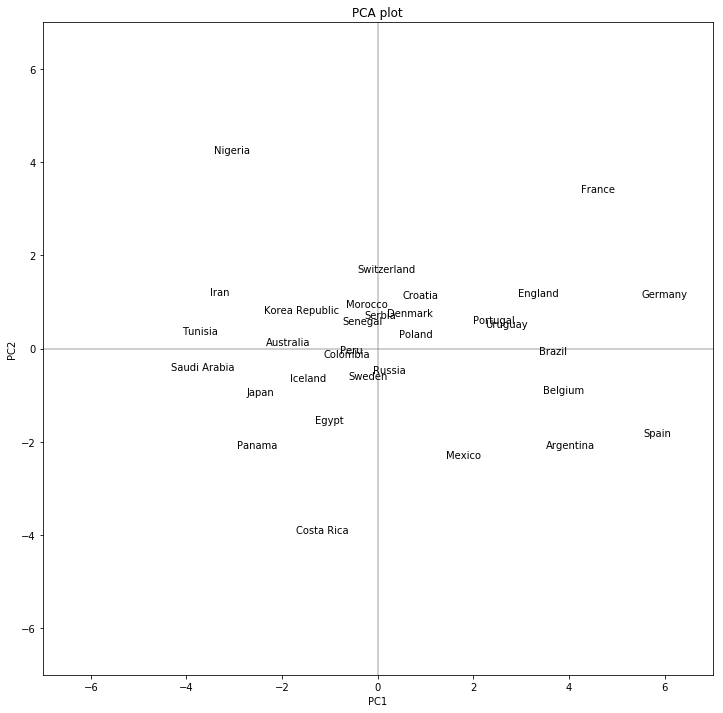

In [149]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

for i in np.arange(n):
    ax.text(pca_wc[i,0], pca_wc[i,1], teams_wc[i])

    
ax.axhline(0, color='gray', alpha=0.5)
ax.axvline(0, color='gray', alpha=0.5)
ax.set_title('PCA plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

In [150]:
loadings = pd.DataFrame(pca_wc_mod.components_, columns=pre_wc_rating.columns.values)
loadings.iloc[:2,:]

,overall,attack,midfield,defence,prestige,start_age,full_age,bup_speed,bup_dribbling,bup_passing,cc_passing,cc_crossing,cc_shooting,d_pressure,d_aggresion,d_width,wage_euros_thousands,value_euros_millions,growth,goalkeeeper_overall
0,0.344615,0.297234,0.330777,0.346562,0.314398,-0.088694,-0.033031,-0.305547,-0.102811,-0.305913,-0.273772,-0.076316,-0.230965,0.175877,0.072288,0.004841,-0.0,-0.0,-0.042762,0.293134
1,0.092605,0.132644,0.047415,0.032724,0.074232,-0.482917,-0.555090,0.080062,0.240904,0.081064,0.062521,-0.048824,0.139404,-0.193788,-0.068769,0.264955,0.0,0.0,0.462669,-0.019433


We can see that PC1 is greatly influenced by `overall`, `defence`, and `midfield`, while PC2 is greatly influenced by `full_age` (negative), `start_age` (negative), and `growth`. This gives us a good way to think about the 2D representation of our dataset summarized by the first two PCs. Teams with higher PC2s generally have lower ages and thus more potential for growth. They are likely to have lots of young, promising players. Teams with higher PC1s are statistically better all-round teams. 

While this PCA plot is not a measure of how likely a team will win the World Cup (since PCAs only involve the predictors), it can still give us an intuition into the various World Cup teams. 

We immediately see that France is probably a strong all-round team that also has young, promising players. Nigeria is probably a below-average team but with young, promising players. Costa Rica is probably a below-average team with older players near their peak. Spain is probably a strong all-round team but with older players near their peak. These largely corroborates what we know about those teams.